In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import time

In [5]:
Site = pd.read_csv('Site_location.txt',sep='\t',header=0,skiprows=[1])
Lon = np.array(Site['dec_long_va'],dtype=float)
Lat = np.array(Site['dec_lat_va'],dtype=float)

In [6]:
Site_new = pd.read_csv('Site_location.txt',sep='\t',header=0,skiprows=[1,2])
Site_new.to_csv('/raid/yifan/Flow_Temp/Temp_Data/Data_TN_airT_streamT/TN_site_information.txt',sep='\t')

In [7]:
import os
Result=os.listdir('/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Maurer_0.125/Tennessee/fluxes_1949_2010/flow_no_header')
print(Result[2])

flow_34.3125_-85.9375


In [8]:
Length_L = len(Result)
print(Length_L)
for i in range(Length_L):
    dir1 = '/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Maurer_0.125/Tennessee/fluxes_1949_2010/flow_no_header/'+Result[i]
Lon_T4 = []
Lat_T4 = []
for i in range(Length_L):
    Lat_T4.append(float(Result[i][5:12]))
    Lon_T4.append(float(Result[i][-8:]))
print(len(Lon_T4),len(Lat_T4))


667
667 667


In [9]:
lon_delta4 = 0.125;
lat_delta4 = 0.125;
nx4 = np.arange(min(Lon_T4),(max(Lon_T4)+lon_delta4),lon_delta4) 
ny4 = np.arange(max(Lat_T4),(min(Lat_T4)-lat_delta4),-lat_delta4)
lon4_2d,lat4_2d = np.meshgrid(nx4,ny4) #transform into a 2D array

In [10]:
# make meshed data
data_mesh4 = np.empty((len(ny4),len(nx4)))
data_mesh4[:] = np.nan
for i in range(len(Lon_T4)):
    lon4_ind = int((Lon_T4[i]-min(Lon_T4))/lon_delta4)
    lat4_ind = int((max(Lat_T4)-Lat_T4[i])/lat_delta4)
    data_mesh4[lat4_ind][lon4_ind] = 1
data4_mesh_masked = np.ma.masked_invalid(data_mesh4)

In [11]:
## Find the grid cell for each site
In_site = []
Loc = np.empty((50,2))# This is the grid cell location for each site
for i in range(50):
    Loc[i,1]=round((Lon[i]-min(Lon_T4))/0.125)
    Loc[i,0]=round((max(Lat_T4)-Lat[i])/0.125)
    if data4_mesh_masked[Loc[i,0],Loc[i,1]]==1:
       In_site.append(1)
    else:
       In_site.append(0)

## Read in the daily stream temperature

In [12]:
def read_USGS_data(file, columns, names):
        '''This function reads USGS streamflow from the directly downloaded format (date are in the 3rd column)

        Input:
                file: directly downloaded streamflow file path [str]
                columns: a list of data colomn numbers, starting from 1. E.g., if the USGS original data has three variables: max_flow, min_flow, mean_flow, and the desired variable is mean_flow, then columns = [3]
                names: a list of data column names. E.g., ['mean_flow']; must the same length as columns

        Return:
                a pd.DataFrame object with time as index and data columns (NaN for missing data points)

        Note: returned data and flow might not be continuous if there is missing data!!!

        '''

        import numpy as np
        import datetime as dt
        import pandas as pd

        ndata = len(columns)
        if ndata != len(names):  # check input validity
                print("Error: input arguments 'columns' and 'names' must have same length!")
                exit()

        f = open(file, 'r')
        date_array = []
        data = []
        for i in range(ndata):
                data.append([])
        while 1:
                line = f.readline().rstrip("\n")  # read in one line
                if line=="":
                        break
                line_split = line.split('\t')
                if line_split[0]=='USGS':  # if data line
                        date_string = line_split[2]  # read in date string
                        date = dt.datetime.strptime(date_string, "%Y-%m-%d")  # convert date to dt object
                        date_array.append(date)

                        for i in range(ndata):  # for each desired data variable
                                col = columns[i]
                                if line_split[3+(col-1)*2] == '':  # if data is missing
                                        value = np.nan
                                elif line_split[3+(col-1)*2] == 'Ice':  # if data is 'Ice'
                                        value = np.nan
                                elif line_split[3+(col-1)*2] == 'Ssn':  # if data is 'Ice'
                                        value = np.nan
                                elif line_split[3+(col-1)*2] == 'Dis':  # if data is 'Ice'
                                        value = np.nan
                                else:  # if data is not missing
                                        value = float(line_split[3+(col-1)*2])
                                data[i].append(value)

        data = np.asarray(data).transpose()
        df = pd.DataFrame(data, index=date_array, columns=names)
        return df


In [13]:
#read in one's USGS data
A = read_USGS_data('3446000.txt',[1,2,3],['maxT','minT','meanT'])

# To examine the hypothesis that I can use the average of max_T and min_T to substitute the mean daily temperature

(0, 25)

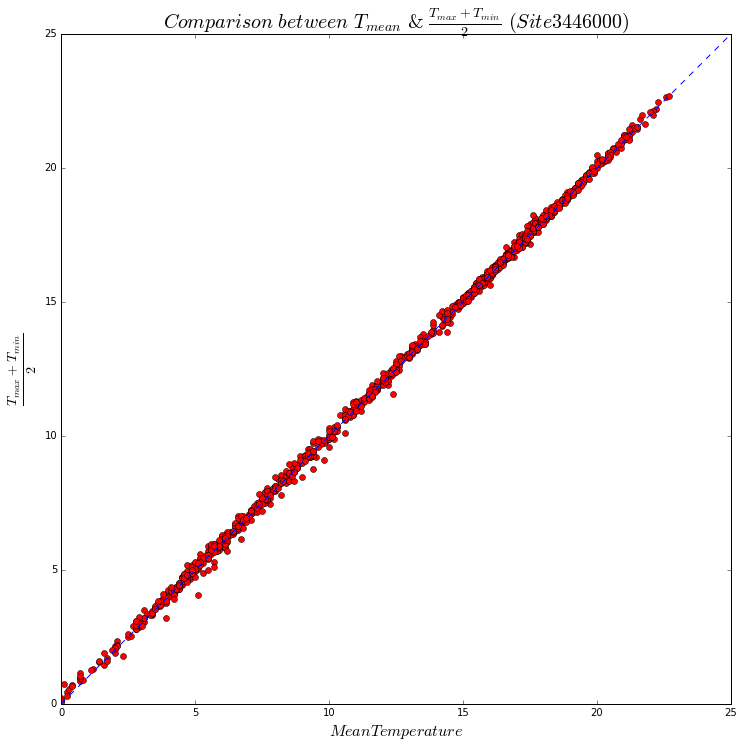

In [14]:
Max_T = A['maxT']
Min_T = A['minT']
Mean_T = A['meanT']
plt.figure(figsize=(12,12))
f1, = plt.plot(Mean_T,(Max_T+Min_T)/2,'ro',label='Maximum Temperature')
plt.plot([0,25],[0,25],'b--')
plt.xlabel(r"$Mean Temperature$",fontsize=16)
plt.ylabel(r"$\frac{T_{max}+T_{min}}{2}$",fontsize=20)
plt.title(r"$Comparison\ between\ T_{mean}\ &\ \frac{T_{max}+T_{min}}{2}\ (Site 3446000)$",fontsize=20)
plt.xlim(0,25)
plt.ylim(0,25)

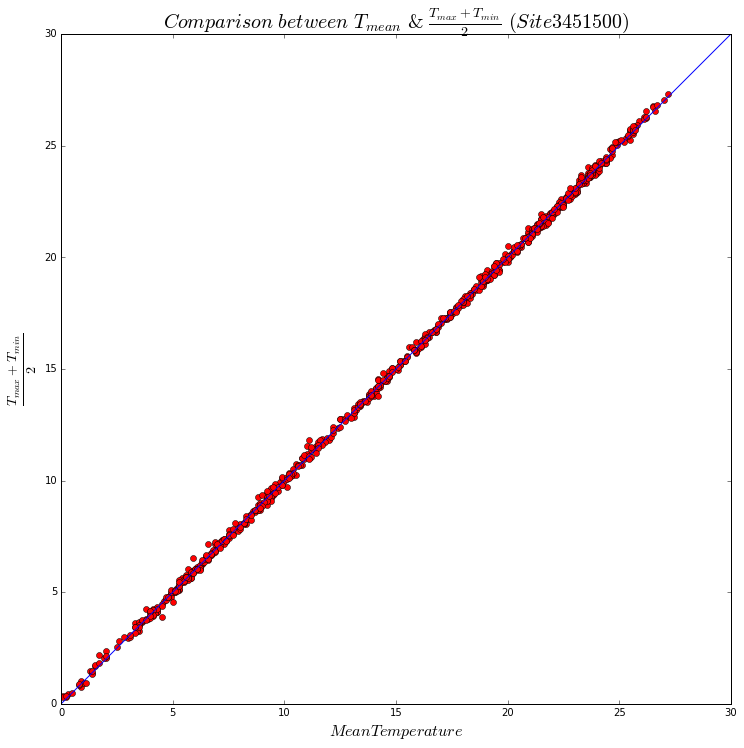

In [15]:
B = read_USGS_data('3451500.txt',[1,2,3],['maxT','minT','meanT'])
Max_T1 = B['maxT']
Min_T1 = B['minT']
Mean_T1 = B['meanT']
plt.figure(figsize=(12,12))
f1, = plt.plot(Mean_T1,(Max_T1+Min_T1)/2,'ro')
plt.plot([0,30],[0,30],'b')
plt.xlabel(r"$Mean Temperature$",fontsize=16)
plt.ylabel(r"$\frac{T_{max}+T_{min}}{2}$",fontsize=20)
plt.title(r"$Comparison\ between\ T_{mean}\ &\ \frac{T_{max}+T_{min}}{2}\  (Site 3451500)$",fontsize=20)

# To examine whether the modeled stream temperature data applied Mohseni parameters has a good fit with observed data

In [16]:
A1 = read_USGS_data('3460000.txt',[1],['meanT'])
lon_A1 = Lon[4]
lat_A1 = Lat[4]
lonA1_ind=round((lon_A1-min(Lon_T4))/0.125)
latA1_ind=round((max(Lat_T4)-lat_A1)/0.125)
Grid_lon = lonA1_ind*0.125+min(Lon_T4)
Grid_lat = max(Lat_T4)-latA1_ind*0.125
filename1 = '/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Maurer_0.125/Tennessee/fluxes_1949_2010/energy_no_header/'+'energy_'+str(Grid_lat)+'_'+str(Grid_lon)
Rawdata1= pd.read_csv(filename1,header=None,sep='\t')
Rawdata1[3]
index_air = np.int64(Rawdata1.loc[Rawdata1[0].isin([1985])].loc[Rawdata1[1].isin([10])].loc[Rawdata1[2].isin([1])].index)
AirTemp = np.array(Rawdata1[3][index_air[0]:(index_air[0]+365)].squeeze(),dtype=float)
AirTemp.shape
StreamTemp = np.array(A1.truncate(before='1985-10-1', after='1986-09-30'),dtype = float)


In [17]:
AirTempRange1 = []
for i in range(101):
    AirTempRange1.append(np.min(AirTemp)+(np.max(AirTemp)-np.min(AirTemp))/100*i)
AirTempRange1 = np.array(AirTempRange1,dtype=float)

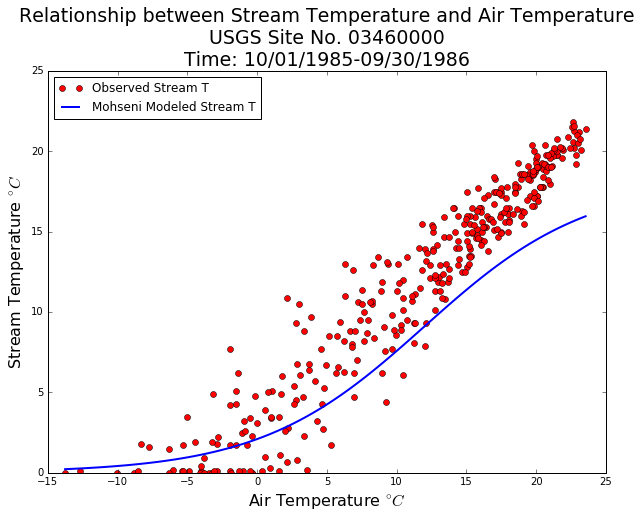

In [18]:
plt.figure(figsize=(10,7.2))
f1_1, = plt.plot(AirTemp,StreamTemp,'ro',label= 'Observed Stream T')
f1_2, = plt.plot(AirTempRange1,(18.2-0)/(1+np.exp(0.17*(11.98-AirTempRange1)))+0,'b',linewidth=2,label='Mohseni Modeled Stream T')
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.legend(handles=[f1_1,f1_2],loc=2)
plt.title('Relationship between Stream Temperature and Air Temperature\nUSGS Site No. 03460000\nTime: 10/01/1985-09/30/1986',fontsize=19)

In [19]:
Filename_airT=os.listdir('/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Maurer_0.125/Tennessee/fluxes_1949_2010/energy_no_header')
print(Filename_airT[2])

energy_34.3125_-86.0625


In [20]:
A2 = read_USGS_data('3497300.txt',[1],['meanT'])
lon_A2 = Lon[13]
lat_A2 = Lat[13]
lonA2_ind=round((lon_A2-min(Lon_T4))/0.125)
latA2_ind=round((max(Lat_T4)-lat_A2)/0.125)
Grid_lon2 = lonA2_ind*0.125+min(Lon_T4)
Grid_lat2 = max(Lat_T4)-latA2_ind*0.125
filename2 = '/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Maurer_0.125/Tennessee/fluxes_1949_2010/energy_no_header/'+'energy_'+str(Grid_lat2)+'_'+str(Grid_lon2)

parse = lambda x: dt.datetime.strptime(x, '%Y %m %d')
df = pd.read_csv(filename2, delim_whitespace=True, parse_dates=[[0,1,2]], index_col=0, date_parser=parse, header=None)


Rawdata2= pd.read_csv(filename2,header=None,sep='\t')
#Rawdata1[3]
index_air2 = np.int64(Rawdata2.loc[Rawdata2[0].isin([1976])].loc[Rawdata2[1].isin([10])].loc[Rawdata2[2].isin([1])].index)
StreamTemp2 = np.array(A2.truncate(before='1976-10-1', after='1979-09-30'),dtype = float)
AirTemp2 = np.array(Rawdata2[3][index_air2[0]:(index_air2[0]+1095)].squeeze(),dtype=float)

In [18]:
#This is useful 
#df.loc[     pd.date_range(dt.datetime(1976,10,1), dt.datetime(1977,4,1))    ,:]

In [21]:
AirTempRange2 = []
for i in range(101):
    AirTempRange2.append(np.min(AirTemp2)+(np.max(AirTemp2)-np.min(AirTemp2))/100*i)
AirTempRange2 = np.array(AirTempRange2,dtype=float)

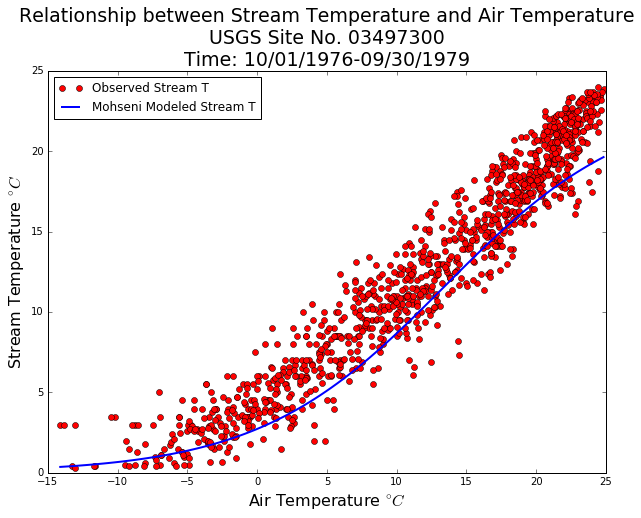

In [22]:
plt.figure(figsize=(10,7.2))
f2_1, = plt.plot(AirTemp2,StreamTemp2,'ro',label='Observed Stream T')
f2_2, = plt.plot(AirTempRange2,(23.2-0)/(1+np.exp(0.15*(13.43-AirTempRange2)))+0,'b',linewidth=2,label='Mohseni Modeled Stream T')
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.legend(handles=[f2_1,f2_2],loc=2)
plt.title('Relationship between Stream Temperature and Air Temperature\nUSGS Site No. 03497300\nTime: 10/01/1976-09/30/1979',fontsize=19)

In [21]:
#LL = pd.read_csv('3460795.txt',skiprows=2,sep='\t',header=None,names=['USGS','Site','Date','T1','S1','T2','S2','T3','S3'])

In [23]:
Site_temp_info = pd.ExcelFile('Site_Temp_info_TN.xlsx')

In [24]:
Column_info = Site_temp_info.parse(sheetname='Sheet1')

In [25]:
R1 = pd.ExcelFile('TandPara_SE.xlsx')
Data1 = R1.parse(sheetname='Sheet1')

In [26]:
alpha_up1 = Data1['alpha']
beta_up1 = Data1['beta']
gama_up1 = Data1['gama']
mu_up1 = Data1['mu']
alpha_down1 = Data1['alpha_down']
beta_down1 = Data1['beta_down']
gama_down1 = Data1['gama_down']
mu_down1 = Data1['mu_down']
T_max1 = Data1['maxT']
T_min1 = Data1['minT']

In [27]:
T_air1 = np.empty((len(alpha_up1),101))
for i in range(len(alpha_up1)):
    for j in range(101):
        T_air1[i,j] = T_min1[i]+j*(T_max1[i]-T_min1[i])/100
T_stream_up1 = np.empty((len(alpha_up1),101))
T_stream_down1 = np.empty((len(alpha_up1),101))
for i in range(len(alpha_up1)):
    for j in range(101):
        T_stream_up1[i,j] = (alpha_up1[i]-mu_up1[i])/(1+np.exp(gama_up1[i]*(beta_up1[i]-T_air1[i,j])))+mu_up1[i]
        T_stream_down1[i,j] = (alpha_down1[i]-mu_down1[i])/(1+np.exp(gama_down1[i]*(beta_down1[i]-T_air1[i,j])))+mu_down1[i]

In [28]:
Raw_location = pd.ExcelFile('Mohseni_site_list_southeast.xlsx')
Location_SE = Raw_location.parse('NC-SC-AL-GA')
Site_number_down = []
Site_number_up_double = []
Site_number_up_single = []
Max_Stream_T_Down = []
Max_Stream_T_Up_Single = []
Max_Stream_T_Up_Double = []
for i in range(len(alpha_up1)):
    if T_stream_down1[i,100]<=22:
        Site_number_down.append(Location_SE['gage_code'][i])
        Max_Stream_T_Down.append(T_stream_down1[i,100])
    if T_stream_up1[i,100]<=22:
        if alpha_down1[i]>100:
            Site_number_up_single.append(Location_SE['gage_code'][i])
            Max_Stream_T_Up_Single.append(T_stream_up1[i,100])
        else:
            Site_number_up_double.append(Location_SE['gage_code'][i])
            Max_Stream_T_Up_Double.append(T_stream_up1[i,100])

In [29]:
len(alpha_up1)

175

In [30]:
Lat_lon = Location_SE.set_index('gage_code')

In [31]:
Lat_lon_up_double = Lat_lon.loc[Site_number_up_double]
Lat_lon_up_single = Lat_lon.loc[Site_number_up_single]
Lat_lon_up_double

,lat,lon
gage_code,,
03068710,38.9106,-79.7061
03276500,39.4067,-85.0128
03414110,36.7461,-85.3725
03425000,36.2481,-85.9553
03533500,36.2061,-84.1081
03535915,35.8872,-84.3244
03580750,35.1922,-86.2811
07053600,37.6183,-93.2431
07053825,36.6983,-93.1286


In [32]:
Lat_lon_down = Lat_lon.loc[Site_number_down]

In [33]:
Lat_lon_down['max_Stream_temperature'] = Max_Stream_T_Down
Lat_lon_up_single['max_Stream_temperature'] = Max_Stream_T_Up_Single
Lat_lon_up_double['max_Stream_temperature'] = Max_Stream_T_Up_Double
Lat_lon_down['Ele(m)']=[674.4,151.0,171.,141.1,255.,225.,230.8,329.8,213.8,146.3,95.7,87.4,97.2]
Lat_lon_up_single['Ele(m)']=[575.7,750.1]
Lat_lon_up_double['Ele(m)']=[674.4,188.3,171.,141.1,255.,225.,230.8,329.8,213.8,146.3,95.7,87.4,97.2]

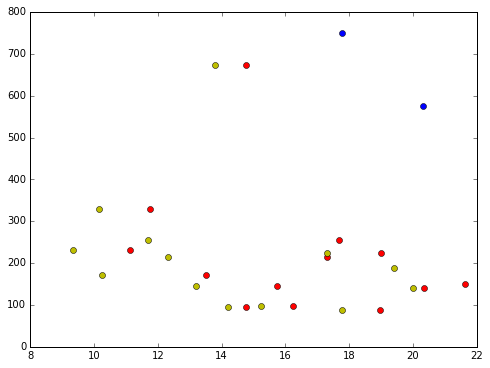

In [34]:
plt.figure(figsize=(8,6))
plt.plot(Lat_lon_down['max_Stream_temperature'],Lat_lon_down['Ele(m)'],'ro')
plt.plot(Lat_lon_up_single['max_Stream_temperature'],Lat_lon_up_single['Ele(m)'],'bo')
plt.plot(Lat_lon_up_double['max_Stream_temperature'],Lat_lon_up_double['Ele(m)'],'yo')

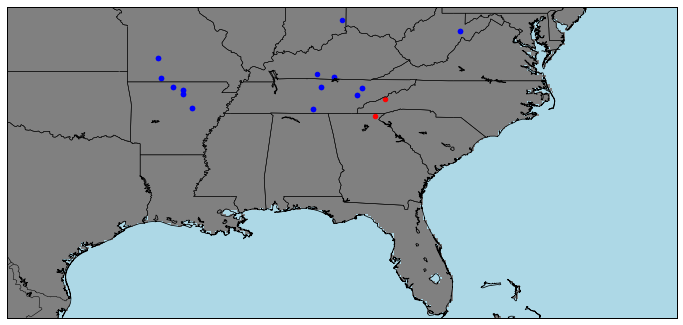

In [35]:
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import matplotlib as mpl

land_color='grey'
ocean_color='lightblue'
plt.figure(figsize=(12,6))
m = Basemap(projection='gall', llcrnrlat=25, urcrnrlat=40, llcrnrlon=-100, urcrnrlon=-70, resolution='i',width=11.9, height=4.2)
#yy, xx, data = mesh_xyz(lats, lons, var, dlat, dlon)
xi1,yi1 = m(np.array(Lat_lon_down['lon'],dtype=float),np.array(Lat_lon_down['lat'],dtype=float))
xi2,yi2 = m(np.array(Lat_lon_up_double['lon'],dtype=float),np.array(Lat_lon_up_double['lat'],dtype=float))
xi3,yi3 = m(np.array(Lat_lon_up_single['lon'],dtype=float),np.array(Lat_lon_up_single['lat'],dtype=float))

m.drawlsmask(land_color=land_color, ocean_color=ocean_color, lakes=True)
m.drawcoastlines(linewidth=0.75)
m.drawstates(linewidth=0.5)
m.drawcountries(linewidth=0.5)

m.scatter(xi3,yi3,color='r')
m.scatter(xi1,yi1,color='b')
m.scatter(xi2,yi2,color='b')



0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48


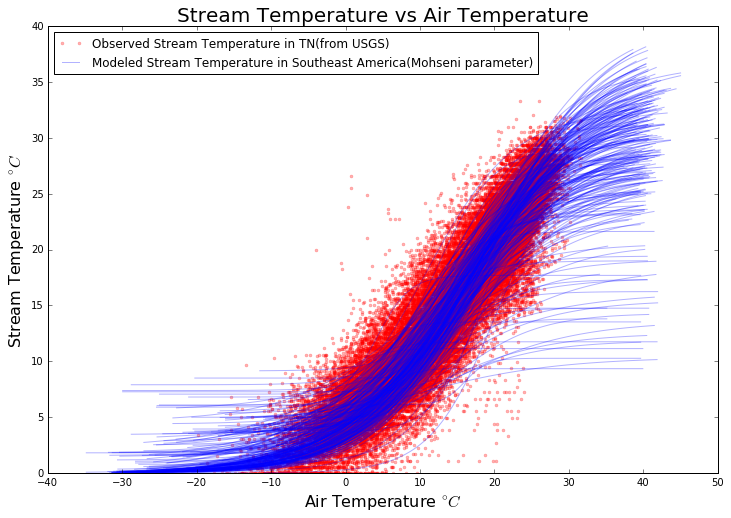

In [36]:
plt.figure(figsize=(12,8))
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.title('Stream Temperature vs Air Temperature',fontsize=20)
plt.ylim(0,35)
#for n in [50]:
for n in range(49):
    file_streamT = str(Site['site_no'][n+1])+'.txt'
    if Column_info['Column1'][n+1] == 0 or Column_info['Column3'][n+1] ==0:
        if Column_info['Column1'][n+1] ==0:
            Column_num = 1
        if Column_info['Column3'][n+1] ==0:
            Column_num = 3  
        A = read_USGS_data(file_streamT,[Column_num],['meanT'])
    else:
        T_max_min = read_USGS_data(file_streamT,[1,2],['maxT','minT'])
        T_max_min['meanT'] = (T_max_min['maxT']+T_max_min['minT'])/2
        A = T_max_min
    lon_A2 = Lon[n+1]
    lat_A2 = Lat[n+1]
    lonA2_ind=round((lon_A2-min(Lon_T4))/0.125)
    latA2_ind=round((max(Lat_T4)-lat_A2)/0.125)
    Grid_lon2 = lonA2_ind*0.125+min(Lon_T4)
    Grid_lat2 = max(Lat_T4)-latA2_ind*0.125
    filename2 = '/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Maurer_0.125/Tennessee/fluxes_1949_2010/energy_no_header/'+'energy_'+str(Grid_lat2)+'_'+str(Grid_lon2)
    
    print(n)
    parse = lambda x: dt.datetime.strptime(x, '%Y %m %d')
    df = pd.read_csv(filename2, delim_whitespace=True, parse_dates=[[0,1,2]], index_col=0, date_parser=parse, header=None)

    df_all = A
    df_all['airT'] = df[3]
    df_final = df_all.dropna()
    df_improve = df_final[df_final<100]
    df_improve = df_improve.dropna()
    print(n)
    f1, = plt.plot(df_improve['airT'],df_improve['meanT'],'r.',label='Observed Stream Temperature in TN(from USGS)',alpha=0.3)
    outputfile = '/raid/yifan/Flow_Temp/Temp_Data/Data_TN_airT_streamT/'+str(Site['site_no'][n+1])+'_airT_streamT'+'.txt'
    df_improve.to_csv(outputfile,sep='\t')
    
    if n == 0:
        df_sum = df_improve
    if df_improve.shape[0]>1:
        dates_shift = df_improve.index - dt.timedelta(days=1)
        df_pre = df_improve.loc[dates_shift,:].dropna()
        index_to_calculate = df_pre.index + dt.timedelta(days=1)
        df_post = df_improve.loc[index_to_calculate]
        df_post['smoothT'] = df_pre['airT'].values*0.9+ df_post['airT'].values*0.1
        df_sum = pd.concat([df_sum,df_post])

for i in range(len(alpha_up1)):
    plt.plot(T_air1[i,],T_stream_up1[i,],'b',alpha=0.3)
    f2, = plt.plot(T_air1[i,],T_stream_down1[i,],'b',label='Modeled Stream Temperature in Southeast America(Mohseni parameter)',alpha=0.3)
    plt.ylim(0,40)
plt.legend(handles=[f1, f2],loc=2)

In [37]:
Column_info

,site_no,Column1,Column2,Column3
0,3438220,0,9999,9999
1,3446000,1,2,0
2,3451500,1,2,0
3,3456991,1,2,0
4,3460000,0,1,2
5,3460795,1,2,0
6,3473000,0,1,2
7,3475000,0,9999,9999
8,3488445,1,2,0
9,3488450,1,2,0


In [38]:
from scipy.optimize import curve_fit

In [39]:
def func(x,alpha,beta,gama,mu):
    return mu+(alpha-mu)/(1+np.exp(gama*(beta-x)))

In [40]:
xdata = np.array(df_sum['airT'],dtype=float).squeeze()
ydata = np.array(df_sum['smoothT'],dtype=float).squeeze()

In [41]:
popt, pcov = curve_fit(func,xdata,ydata)
alpha1 = popt[0]
beta1 = popt[1]
gama1 = popt[2]
mu1 = popt[3]

In [42]:
y = mu1+(alpha1-mu1)/(1+np.exp(gama1*(beta1-xdata)))

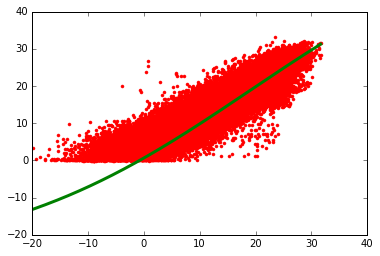

In [43]:
plt.plot(xdata,df_sum['meanT'],'r.')
plt.plot(sorted(xdata),sorted(y),'g-',linewidth=3)

In [41]:
popt

array([  6.49656787e+01,   1.89769712e+01,   4.36427763e-02,
        -2.74487100e+01])

[[Variables]]
    alpha:   28.4050829 +/- nan      (nan%) (init= 30)
    beta:    14.5330086 +/- nan      (nan%) (init= 1.6)
    gama:    0.17109811 +/- nan      (nan%) (init= 0.1)
    mu:      0          +/- nan      (nan%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)


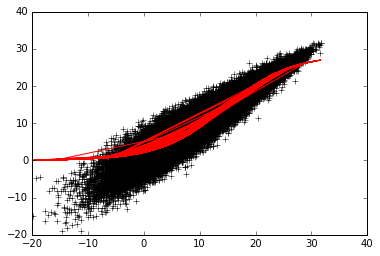

In [51]:
from lmfit import minimize, Parameters, Parameter, report_fit

# create data to be fitted
x = xdata
data = ydata

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    alpha2 = params['alpha'].value
    beta2 = params['beta'].value
    gama2 = params['gama'].value
    mu2 = params['mu'].value

    model = mu2+(alpha2-mu2)/(1+np.exp(gama2*(beta2-x)))
    return (model - data)

# create a set of Parameters
params = Parameters()
params.add('alpha',   value= 30)
params.add('beta', value= 1.6)
params.add('gama', value= 0.1)
params.add('mu', value= 0, min=0)


# do fit, here with leastsq model
result = minimize(fcn2min, params, method='leastsq',args=(x, data))

# calculate final result
final = data + result.residual

# write error report
report_fit(result.params)

# try to plot results
try:
    import pylab
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass

In [48]:
alpha2 = result.params['alpha'].value
beta2 = result.params['beta'].value
gama2 = result.params['gama'].value
mu2 = result.params['mu'].value

(0, 35)

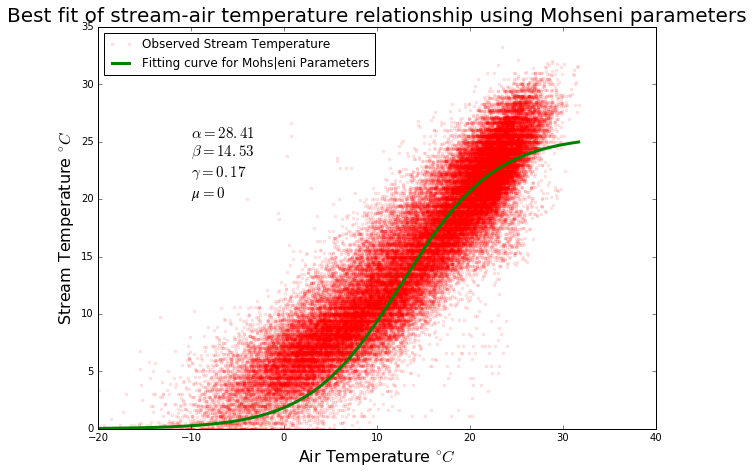

In [52]:
y2 = mu2+(alpha2-mu2)/(1+np.exp(gama2*(beta2-xdata)))
plt.figure(figsize=(10,7.2))
fm_1, = plt.plot(xdata,df_sum['meanT'],'r.',label='Observed Stream Temperature',alpha=0.1)
fm_2, = plt.plot(sorted(xdata),sorted(y2),'g-',linewidth=3,label='Fitting curve for Mohs|eni Parameters')
plt.legend(handles=[fm_1,fm_2],loc=2)
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.title('Best fit of stream-air temperature relationship using Mohseni parameters',fontsize=20)
plt.text(-10,20,r"$\alpha = 28.41$"+"\n"+r"$\beta = 14.53$"+"\n"+r"$\gamma=0.17$"+"\n"+r"$μ=0$",fontsize=15)
plt.ylim(0,35)

In [45]:
nn=40
mm=24
X = np.linspace(np.min(xdata),np.max(xdata),nn+1)
X = X[0:-1]+(np.max(xdata)-np.min(xdata))/(nn+1)
Y = np.linspace(np.min(df_sum['meanT']),np.max(df_sum['meanT']),mm+1)
Y = Y[0:-1]+(np.max(df_sum['meanT'])-np.min(df_sum['meanT']))/(mm+1)
Y,X = np.meshgrid(Y,X)

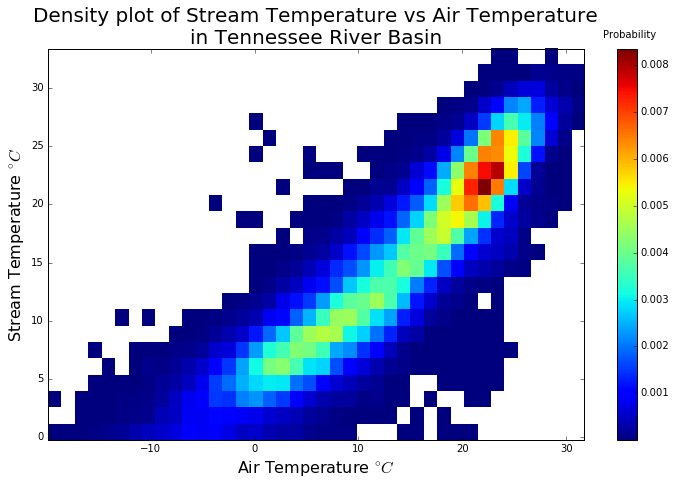

In [46]:
plt.figure(figsize=(12,7))
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.xlim(-30,40)
plt.ylim(0,35)
plt.title('Density plot of Stream Temperature vs Air Temperature\nin Tennessee River Basin', fontsize=20)
A = plt.hist2d(xdata,df_sum['meanT'], bins=[nn,mm],normed=True,cmin=0.000001)
cbar = plt.colorbar()
cbar.set_label('Probability',labelpad=-40, y=1.05,rotation=360)

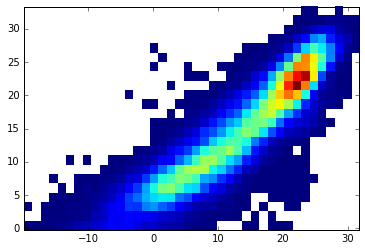

In [47]:
A1 = plt.hist2d(xdata,df_sum['meanT'], bins=[nn,mm],cmin=1)

In [48]:
levels = [0.0005,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009]
B = np.nan_to_num(A[0])
number_sum = np.sum(B)
labels = []
for i in range(len(levels)):
    number_of_point = np.sum(B[np.where(B>levels[i])])
    percentage = number_of_point/number_sum
    string = str(round(percentage*100,1))+'%'
    labels.append(string)
print(percentage)

0.0


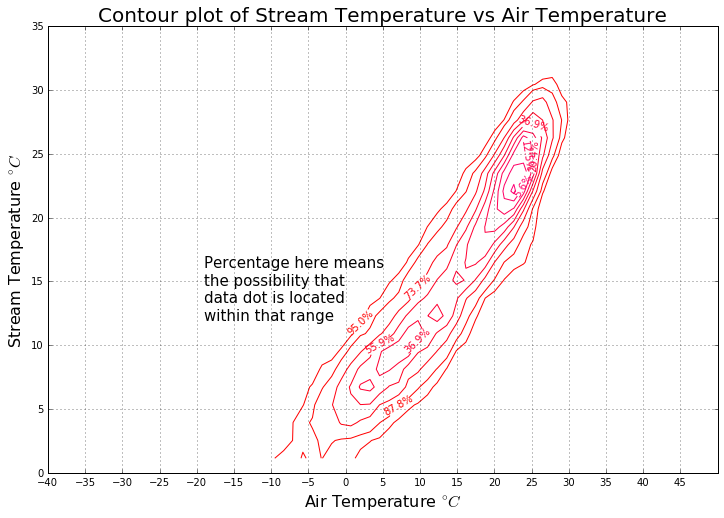

In [49]:
from matplotlib.colors import Colormap
import scipy.ndimage as ndimage
fig = plt.figure(figsize=(12,8))
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.title('Contour plot of Stream Temperature vs Air Temperature', fontsize=20)
#Z2 = ndimage.gaussian_filter(A1[0], sigma=1.0, order=0)

CS = plt.contour(X, Y, A[0],levels=levels,colors=('#ff0000', '#ff0000', '#ff0011','#ff0022','#ff0033','#ff0044', '#ff0055', '#ff0066', '#ff0077','#ff0088', '#ff0099'))
#plt.clabel(CS, inline =2, fontsize=8,fmt='%1.4f')
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

fmt = {}
strs = labels
for l, s in zip(CS.levels, strs):
    fmt[l] = s

# Label every other level using strings


# for i in range(len(alpha_up1)):
#      plt.plot(T_air1[i,],T_stream_up1[i,],'b',alpha=0.3)
#      if i ==1:
#          f2m, = plt.plot(T_air1[i,],T_stream_down1[i,],'b',label='Modeled Stream Temperature\nin Southeast America(Mohseni parameter)',alpha=0.3)
#      else:
#          f2, = plt.plot(T_air1[i,],T_stream_down1[i,],'b',alpha=0.3)
#      plt.ylim(0,40)

plt.clabel(CS, CS.levels[::1], inline=True, fmt=fmt, fontsize=10)
plt.xlim(-40,50)

#plt.legend(handles=[f2m],loc='upper left')
plt.text(x=-19,y=12,s='Percentage here means\nthe possibility that\ndata dot is located\nwithin that range',fontsize=15)
ax = fig.gca()
ax.set_xticks(np.arange(-40,50,5))
ax.set_yticks(np.arange(0,40,5))
plt.grid()
plt.show()

In [50]:
Selected = pd.ExcelFile('Tennessee_stream_temperature_sites.xlsx')
Selected = Selected.parse('USGS_upstream_sites')
Selected_site_num = Selected['USGS_code']
siteno = Site['site_no']

In [51]:
Site_index = []
for i in range(len(siteno)):
    for j in range(len(Selected_site_num)):
        if siteno[i] == Selected_site_num[j]:
            Site_index.append(i)

3446000.txt
3460000.txt
3473000.txt
3488445.txt
3488450.txt
3488500.txt
3497300.txt
3501500.txt
3512000.txt
3524000.txt
3524500.txt
3526000.txt
3529500.txt
3544970.txt
3558000.txt
3571000.txt
3592800.txt
3592825.txt
3598165.txt
359816545.txt
3598173.txt
3598177.txt
3604000.txt


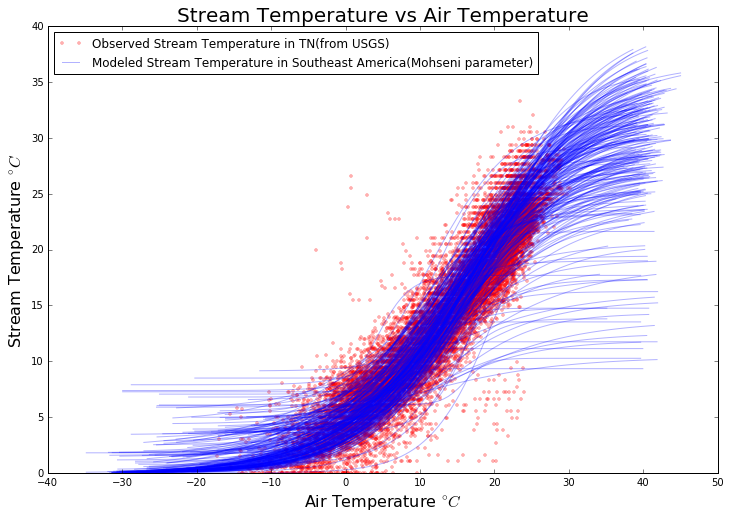

In [52]:
plt.figure(figsize=(12,8))
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.title('Stream Temperature vs Air Temperature',fontsize=20)
plt.ylim(0,35)
for n in Site_index:
    file_streamT = str(Site['site_no'][n])+'.txt'
    if Column_info['Column1'][n] == 0 or Column_info['Column3'][n] ==0:
        if Column_info['Column1'][n] ==0:
            Column_num = 1
        if Column_info['Column3'][n] ==0:
            Column_num = 3  
        A = read_USGS_data(file_streamT,[Column_num],['meanT'])
    else:
        T_max_min = read_USGS_data(file_streamT,[1,2],['maxT','minT'])
        T_max_min['meanT'] = (T_max_min['maxT']+T_max_min['minT'])/2
        A = T_max_min
    lon_A2 = Lon[n]
    lat_A2 = Lat[n]
    lonA2_ind=round((lon_A2-min(Lon_T4))/0.125)
    latA2_ind=round((max(Lat_T4)-lat_A2)/0.125)
    Grid_lon2 = lonA2_ind*0.125+min(Lon_T4)
    Grid_lat2 = max(Lat_T4)-latA2_ind*0.125
    filename2 = '/raid2/ymao/VIC_RBM_east_RIPS/RIPS/model_run/output/vic/Maurer_0.125/Tennessee/fluxes_1949_2010/energy_no_header/'+'energy_'+str(Grid_lat2)+'_'+str(Grid_lon2)

    parse = lambda x: dt.datetime.strptime(x, '%Y %m %d')
    df = pd.read_csv(filename2, delim_whitespace=True, parse_dates=[[0,1,2]], index_col=0, date_parser=parse, header=None)

    df_all = A
    df_all['airT'] = df[3]
    df_final = df_all.dropna()
    df_improve = df_final[df_final<100]
    df_improve = df_improve.dropna()
    print(file_streamT)
    f1, = plt.plot(df_improve['airT'],df_improve['meanT'],'r.',label='Observed Stream Temperature in TN(from USGS)',alpha=0.3)
    
    if n == Site_index[0]:
        df_sum1 = df_improve
    if df_improve.shape[0]>1:
        dates_shift = df_improve.index - dt.timedelta(days=1)
        df_pre = df_improve.loc[dates_shift,:].dropna()
        index_to_calculate = df_pre.index + dt.timedelta(days=1)
        df_post = df_improve.loc[index_to_calculate]
        df_post['smoothT'] = df_pre['airT'].values*0.9+ df_post['airT'].values*0.1
        df_sum1 = pd.concat([df_sum1,df_post])

for i in range(len(alpha_up1)):
    plt.plot(T_air1[i,],T_stream_up1[i,],'b',alpha=0.3)
    f2, = plt.plot(T_air1[i,],T_stream_down1[i,],'b',label='Modeled Stream Temperature in Southeast America(Mohseni parameter)',alpha=0.3)
    plt.ylim(0,40)
plt.legend(handles=[f1, f2],loc=2)

[[Variables]]
    alpha:   27.1790499 +/- 0        (0.00%) (init= 30)
    beta:    13.9308023 +/- 0        (0.00%) (init= 1.6)
    gama:    0.18201091 +/- 0        (0.00%) (init= 0.1)
    mu:      0          +/- 0         (init= 0)
[[Correlations]] (unreported correlations are <  0.100)


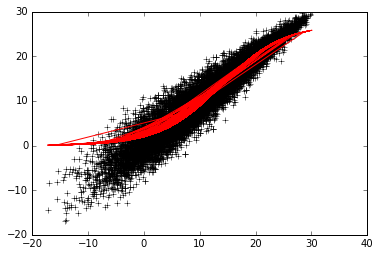

(0, 35)

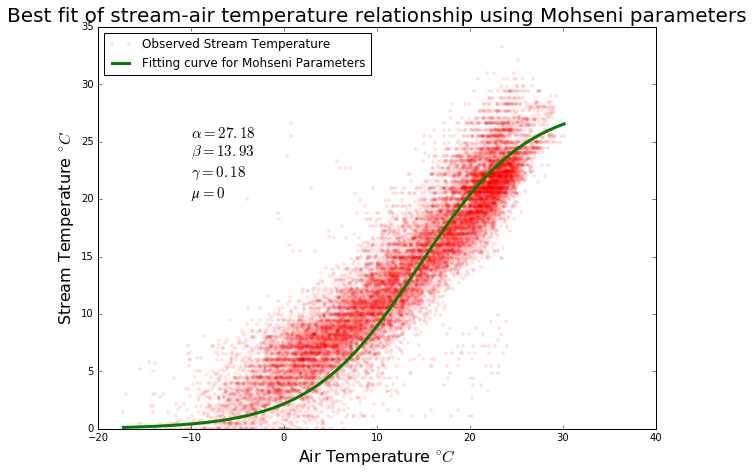

In [78]:
xdata1 = np.array(df_sum1['airT'],dtype=float).squeeze()
ydata1 = np.array(df_sum1['smoothT'],dtype=float).squeeze()

x1 = xdata1
data1 = ydata1

# define objective function: returns the array to be minimized
def fcn2min1(params, x1, data1):
    """ model decaying sine wave, subtract data"""
    alpha2 = params['alpha'].value
    beta2 = params['beta'].value
    gama2 = params['gama'].value
    mu2 = params['mu'].value

    model = mu2+(alpha2-mu2)/(1+np.exp(gama2*(beta2-x1)))
    return model - data1

# create a set of Parameters
params1 = Parameters()
params1.add('alpha',   value= 30)
params1.add('beta', value= 1.6)
params1.add('gama', value= 0.1)
params1.add('mu', value= 0, min=0)


# do fit, here with leastsq model
result1 = minimize(fcn2min1, params1, args=(x1, data1))

# calculate final result
final = data1 + result1.residual

# write error report
report_fit(result1.params)

# try to plot results
try:
    import pylab
    pylab.plot(x1, data1, 'k+')
    pylab.plot(x1, final, 'r')
    pylab.show()
except:
    pass


alpha3 = result.params['alpha'].value
beta3 = result.params['beta'].value
gama3 = result.params['gama'].value
mu3 = result.params['mu'].value


y3 = mu3+(alpha3-mu3)/(1+np.exp(gama3*(beta3-xdata1)))
plt.figure(figsize=(10,7.2))
fu_1, = plt.plot(xdata1,df_sum1['meanT'],'r.',label='Observed Stream Temperature',alpha=0.1)
fu_2, = plt.plot(sorted(xdata1),sorted(y3),'g-',linewidth=3,label='Fitting curve for Mohseni Parameters')
plt.legend(handles=[fu_1,fu_2],loc=2)
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.title('Best fit of stream-air temperature relationship using Mohseni parameters',fontsize=20)
plt.text(-10,20,r"$\alpha = 27.18$"+"\n"+r"$\beta = 13.93$"+"\n"+r"$\gamma=0.18$"+"\n"+r"$μ=0$",fontsize=15)
plt.ylim(0,35)

In [77]:
result1.residual.shape

(15816,)

(0, 35)

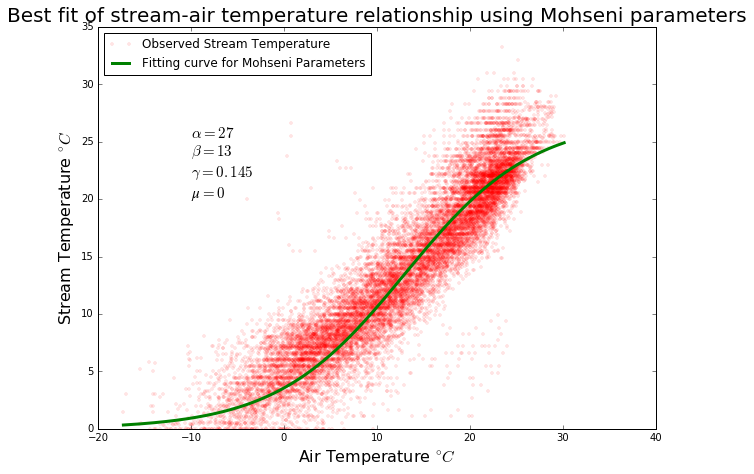

In [89]:
alpha4 = 27
beta4 = 13
gama4 = 0.145
mu4 = 0


y4 = mu4+(alpha4-mu4)/(1+np.exp(gama4*(beta4-xdata1)))
plt.figure(figsize=(10,7.2))
fu_1, = plt.plot(xdata1,df_sum1['meanT'],'r.',label='Observed Stream Temperature',alpha=0.1)
fu_2, = plt.plot(sorted(xdata1),sorted(y4),'g-',linewidth=3,label='Fitting curve for Mohseni Parameters')
plt.legend(handles=[fu_1,fu_2],loc=2)
plt.ylabel(r"Stream Temperature $^{\circ}C$",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.title('Best fit of stream-air temperature relationship using Mohseni parameters',fontsize=20)
plt.text(-10,20,r"$\alpha = 27$"+"\n"+r"$\beta = 13$"+"\n"+r"$\gamma=0.145$"+"\n"+r"$μ=0$",fontsize=15)
plt.ylim(0,35)

In [2]:
from lmfit import minimize, Parameters, Parameter, report_fit
